# This jupyter notebook is prepared  by Justin Mazor

# 1. Load Data and perform basic EDA 

## I. import libraries necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
import sklearn

## II.  import the data to a dataframe and show the count of rows and columns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jmazor/Machine_A4/main/hrdata3.csv')
print(df.shape)

(12977, 8)


## III. Show the top 5 and last 5 rows 

In [3]:
print(df)

       Unnamed: 0  enrollee_id  city_development_index  experience  \
0               1        29725                   0.776          15   
1               4          666                   0.767          21   
2               6        28806                   0.920           5   
3               7          402                   0.762          13   
4               8        27107                   0.920           7   
...           ...          ...                     ...         ...   
12972       19149          251                   0.920           9   
12973       19150        32313                   0.920          10   
12974       19152        29754                   0.920           7   
12975       19155        24576                   0.920          21   
12976       19156         5756                   0.802           0   

       company_size  last_new_job  training_hours  target  
0                 2             5              47     0.0  
1                 2             4      

## IV. Is there any null values on any column?

Presence of Null Values: False


<AxesSubplot:>

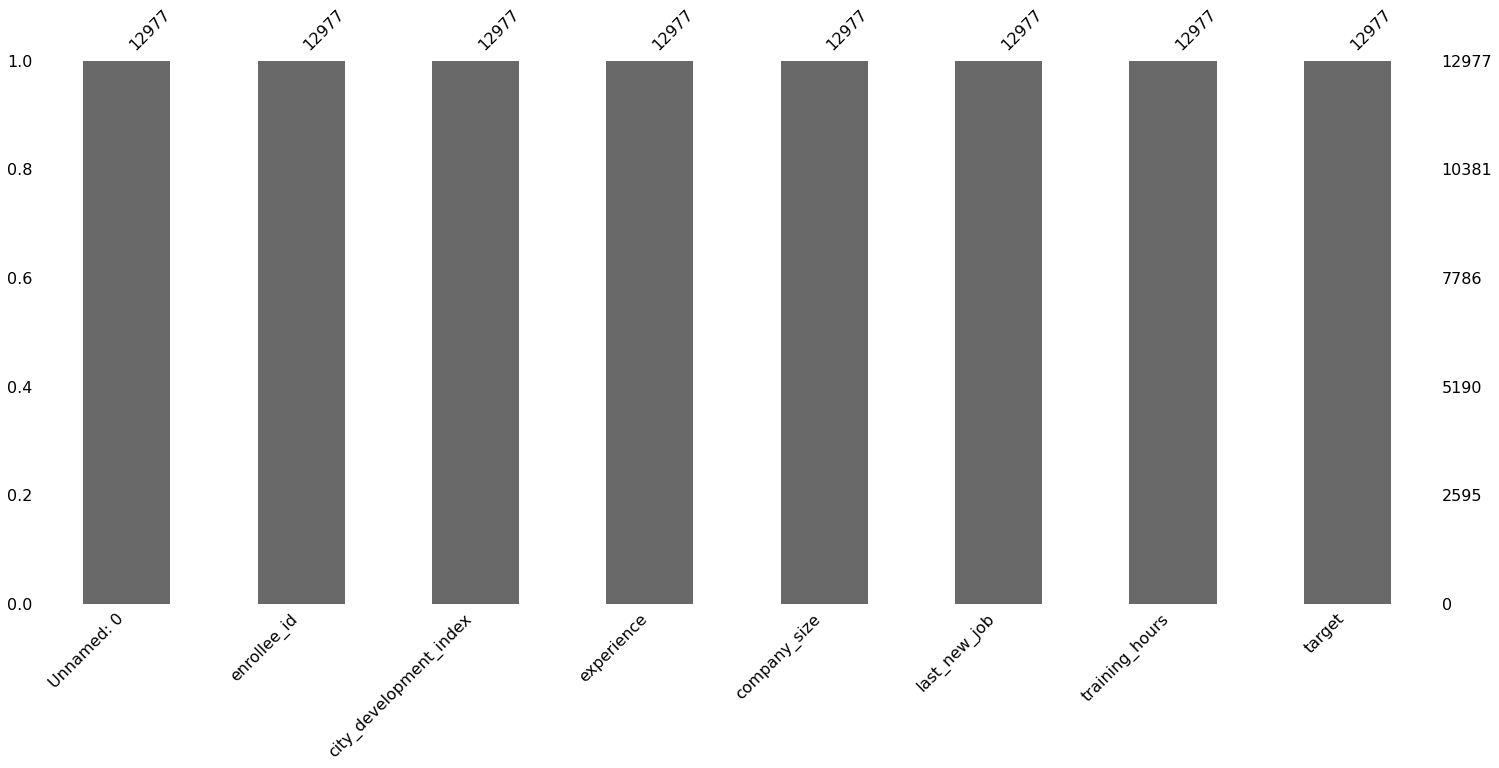

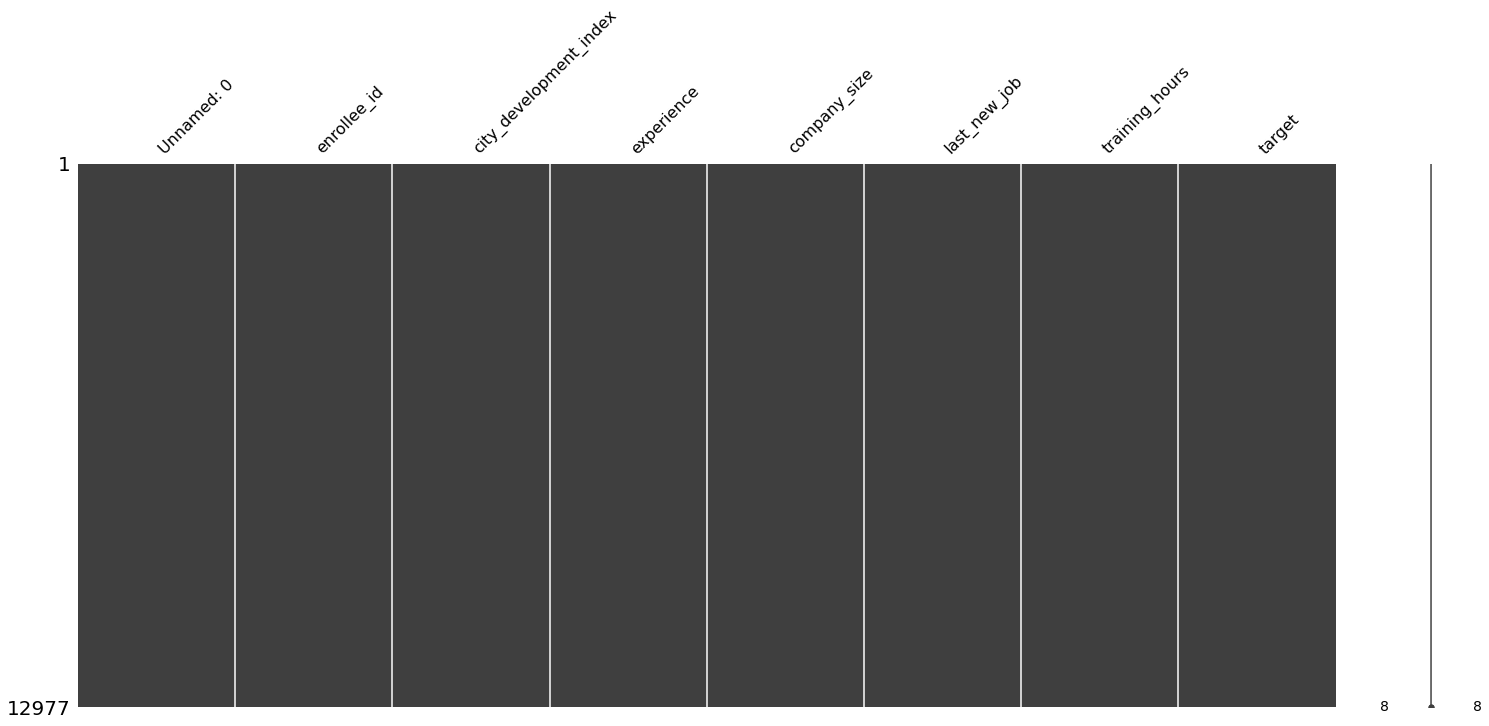

In [4]:
print("Presence of Null Values: "+ str(df.isnull().values.any()))
msno.bar(df)
msno.matrix(df)

## V. Are all the columns numeric such as float or int? If not, please convert them to int before going to the next step.

In [5]:
print(df.dtypes)

Unnamed: 0                  int64
enrollee_id                 int64
city_development_index    float64
experience                  int64
company_size                int64
last_new_job                int64
training_hours              int64
target                    float64
dtype: object


## VI.  plot the heatmap with correlations to get some more idea about the data.

<AxesSubplot:>

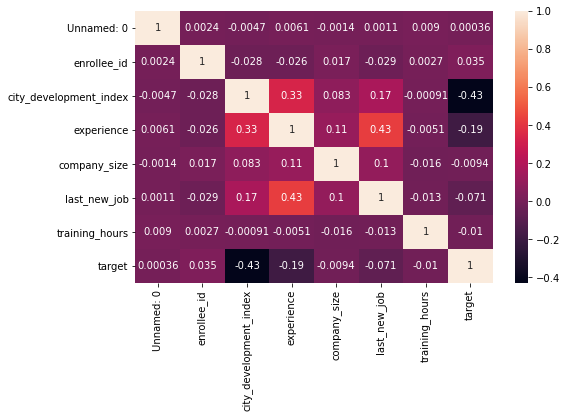

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)

# 2.   Feature Selection and Pre-processing  

## I. Put all the data from the dataframe into X, except the enrolle_id and the target columns

In [7]:
#del df['enrollee_id']
X = df.drop(columns=['Unnamed: 0','target', 'enrollee_id'])
print(X)

       city_development_index  experience  company_size  last_new_job  \
0                       0.776          15             2             5   
1                       0.767          21             2             4   
2                       0.920           5             2             1   
3                       0.762          13             0             5   
4                       0.920           7             2             1   
...                       ...         ...           ...           ...   
12972                   0.920           9             2             1   
12973                   0.920          10             3             3   
12974                   0.920           7             1             1   
12975                   0.920          21             2             4   
12976                   0.802           0             4             2   

       training_hours  
0                  47  
1                   8  
2                  24  
3                  18  
4  

## II. Perform feature scaling on the data of X with StandardScaler and show some sample data from X after scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_features = ["city_development_index", "experience", "company_size", "last_new_job", "training_hours"]

In [9]:
print(X_scaled)
#print(np.random.choice(X_scaled, size=(4, 5)))

[[-0.50342203  0.63395707 -0.5747232   1.69076217 -0.30839586]
 [-0.57841303  1.54600905 -0.5747232   1.08113696 -0.95180478]
 [ 0.69643399 -0.88612956 -0.5747232  -0.74773864 -0.68784215]
 ...
 [ 0.69643399 -0.58211224 -1.0314958  -0.74773864 -0.67134448]
 [ 0.69643399  1.54600905 -0.5747232   1.08113696 -0.35788885]
 [-0.28678136 -1.64617288  0.338822   -0.13811344  0.51648738]]


# 3. KMeans Clustering 

## I. Import related library for Kmeans and perform Kmeans on X (note that it was scaled already). Make sure to put random_state = 47 (it can be any number, but use 47 so that you will produce almost the same result as us). Use k-means++ for the initial centroids. You should know from the problem description how many clusters we are interested in.

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init='k-means++', random_state=42)
kmeans_inverse = KMeans(n_clusters = 2, init='k-means++', random_state=42)
kmeans_inverse.fit_transform(X)
kmeans.fit_transform(X_scaled)

array([[1.58242543, 2.63846565],
       [1.74373937, 2.93508882],
       [2.58013391, 1.3377993 ],
       ...,
       [2.56287347, 1.51820879],
       [1.14332054, 2.96148422],
       [2.85725124, 1.29590719]])

## II. Show the cluster centers as it is and then inverse the scale and show the centers. Please explain in words about the centers relating them to the columns of the data set

In [11]:
print(kmeans.cluster_centers_)
print(scaler.inverse_transform(kmeans.cluster_centers_))
print(kmeans_inverse.cluster_centers_)

[[ 0.44207862  0.90194334  0.2125493   0.77751437 -0.01777135]
 [-0.31296932 -0.6385303  -0.15047416 -0.55044088  0.01258122]]
[[ 0.88947369 16.76296709  3.72355456  3.50195204 64.61609965]
 [ 0.79885707  6.6288497   2.92879705  1.3236378  66.45590945]]
[[  0.83639888  10.83377685   3.26905531   2.23474625  41.97690553]
 [  0.83649939  10.81099796   3.21181263   2.19144603 167.34052953]]


EXPLAIN IN WORDS

## III. Show the distance matrix

In [12]:
print(kmeans.transform(X_scaled))

[[1.58242543 2.63846565]
 [1.74373937 2.93508882]
 [2.58013391 1.3377993 ]
 ...
 [2.56287347 1.51820879]
 [1.14332054 2.96148422]
 [2.85725124 1.29590719]]


## IV. Show the labels

In [13]:
print(kmeans.labels_)

[0 0 1 ... 1 0 1]


## V. Add a new column to your data frame called cluster_label and assign the cluster label for the instances based on the K-means cluster label

In [14]:
df['cluster_label'] = kmeans.labels_

## VI. The target column of our data frame is floating-point numbers. So, this number is not comparable with the cluster label. Add a column target_int and write a function or use a strategy to store the int version of the target column into the target_int column (For example, 1.0 in the target will be 1 in the target_int, 0.0 will be 0)

In [15]:
df = df.astype({'target': int})
df.rename(columns = {'target':'target_int'}, inplace = True)

## VII. Show the top 5 rows of the dataframe now that shows you have added those two columns and they have the correct values

In [16]:
print(df)

       Unnamed: 0  enrollee_id  city_development_index  experience  \
0               1        29725                   0.776          15   
1               4          666                   0.767          21   
2               6        28806                   0.920           5   
3               7          402                   0.762          13   
4               8        27107                   0.920           7   
...           ...          ...                     ...         ...   
12972       19149          251                   0.920           9   
12973       19150        32313                   0.920          10   
12974       19152        29754                   0.920           7   
12975       19155        24576                   0.920          21   
12976       19156         5756                   0.802           0   

       company_size  last_new_job  training_hours  target_int  cluster_label  
0                 2             5              47           0              0  
1

## VIII. Now, we would like to compare the cluster label with the ground truth. Print confusion matrix that compares the target_int and the cluster_label, show the classification_report, and then show the total number of misclassification.

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_true=df['target_int'], y_pred=df['cluster_label']))
print(classification_report(y_true=df['target_int'], y_pred=df['cluster_label']))
print("Misclassified samples: " + str((df['target_int'] != df['cluster_label']).sum()))

[[4855 5840]
 [ 533 1749]]
              precision    recall  f1-score   support

           0       0.90      0.45      0.60     10695
           1       0.23      0.77      0.35      2282

    accuracy                           0.51     12977
   macro avg       0.57      0.61      0.48     12977
weighted avg       0.78      0.51      0.56     12977

Misclassified samples: 6373


## IX. Discuss the numbers from 3 Viii and any thoughts on it.

DISCUSS

## X. Show the inertia of the cluster

In [18]:
print(kmeans.inertia_)

49643.91099099734


## XI. What is the elbow method and what is its purpose of it in the case of KMeans clustering?

Discuss

The elbow method is a strategy to determine the number of clusteres to be used in a kmeans model. Where there is sharp turn or elbow in the graph of the wcss is the number of clusters that should be used.

## XII. Although we just wanted 2 clusters, we still would like to see what will happen if you increase the number of clusters. Plot the inertia for the different numbers of clusters from 2 to 20. 

Text(0, 0.5, 'WCSS')

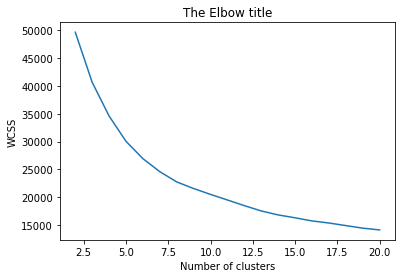

In [19]:
wcss=[]
for i in range(2,21):
    kmeans_test = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans_test.fit(X_scaled)
    wcss_iter = kmeans_test.inertia_
    wcss.append(wcss_iter)
    
number_clusters = range(2,21)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [20]:
print(df)
print(X_scaled)

       Unnamed: 0  enrollee_id  city_development_index  experience  \
0               1        29725                   0.776          15   
1               4          666                   0.767          21   
2               6        28806                   0.920           5   
3               7          402                   0.762          13   
4               8        27107                   0.920           7   
...           ...          ...                     ...         ...   
12972       19149          251                   0.920           9   
12973       19150        32313                   0.920          10   
12974       19152        29754                   0.920           7   
12975       19155        24576                   0.920          21   
12976       19156         5756                   0.802           0   

       company_size  last_new_job  training_hours  target_int  cluster_label  
0                 2             5              47           0              0  
1

## XIII. Show a scatter plot with training hours against experience where the points should be colored based on the two cluster labels. Write any thoughts on this plot.

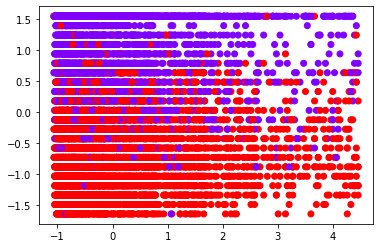

In [21]:
plt.scatter(X_scaled[:,X_features.index("training_hours")],X_scaled[:,X_features.index("experience")],c=df['cluster_label'],cmap='rainbow')

THOUGHTS

## XIV. Show a scatter plot with any other two attributes you are interested in like 3 Xiii and add your thoughts on your plot as well

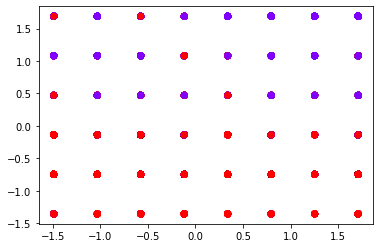

In [22]:
plt.scatter(X_scaled[:,X_features.index('company_size')],X_scaled[:,X_features.index('last_new_job')],c=df['cluster_label'],cmap='rainbow')

THOUGHTS

# 4. AgglomerativeClustering

## I. Plot a dendrogram (make the figure size relatively big, but still you will not be able to see it completely. However, it least this will give you an idea on how many cluster would you like to generate)

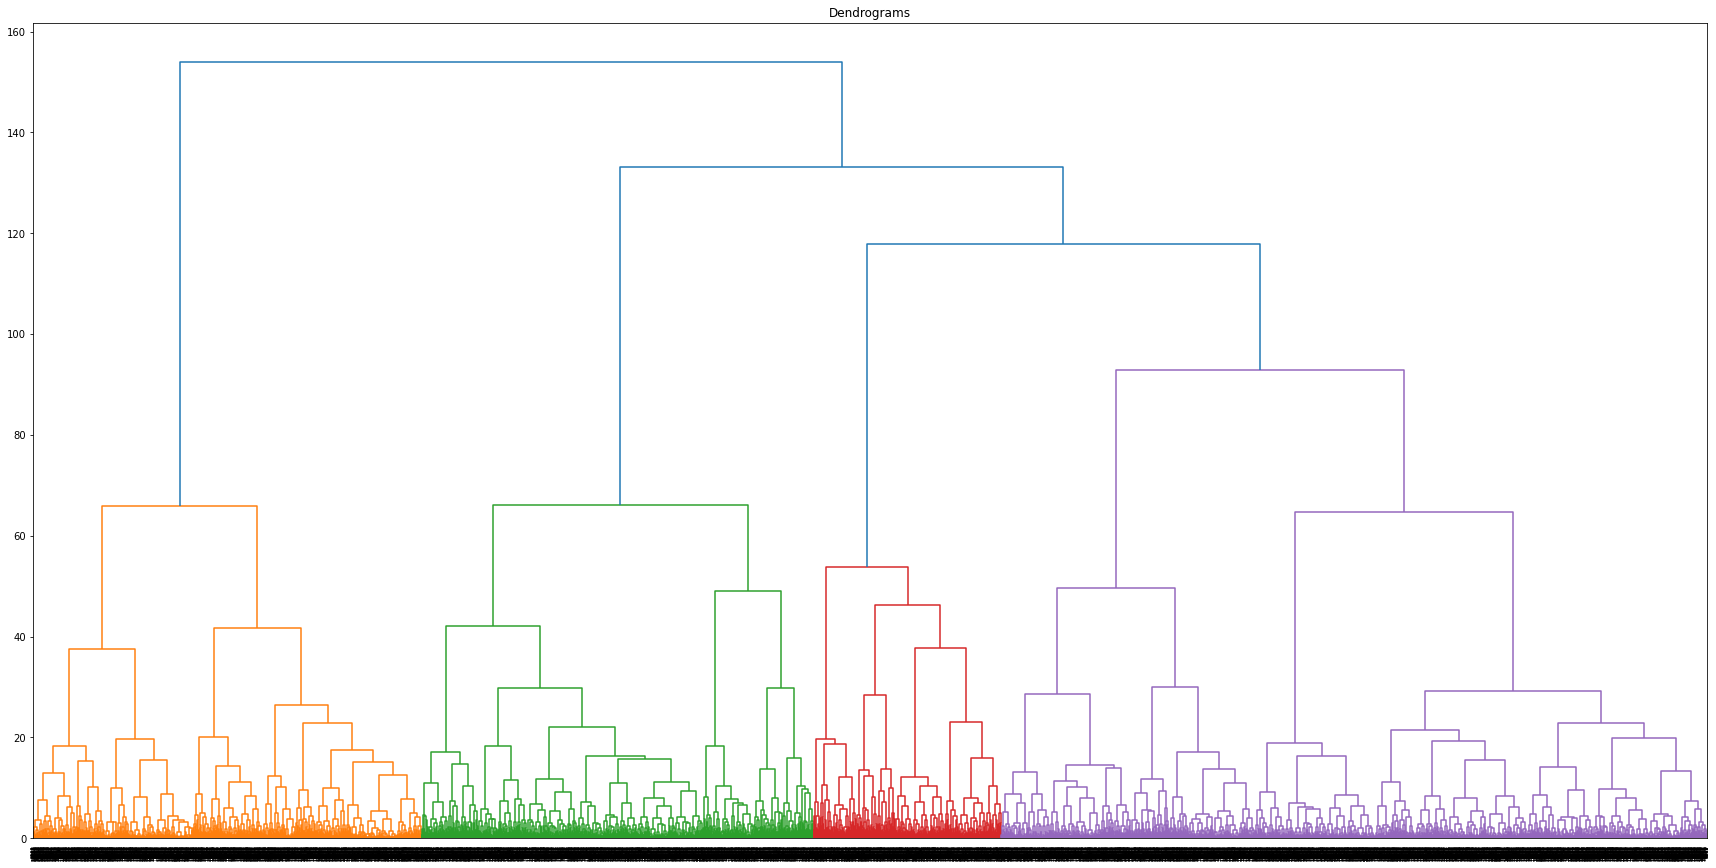

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

## II. Perform AgglomerativeClustering with 2 clusters first, and use euclidean distance for affinity and linkage = 'ward' 

In [24]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustering.fit(X_scaled)
print(clustering.labels_)

[1 1 0 ... 0 1 0]


## III. After creating the clusters, plot training hours against experience like 3.Xiii and discuss if anything interesting

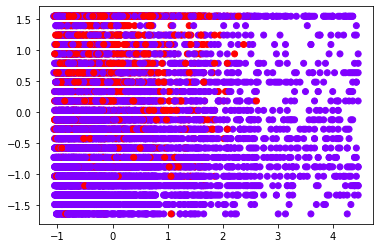

In [25]:
plt.scatter(X_scaled[:,X_features.index("training_hours")],X_scaled[:,X_features.index("experience")],c=clustering.labels_,cmap='rainbow')

DISCUSS

## IV. Then, increase the number of clusters to 4 or 5 and build the clusters again and plot them again to see any difference.

In [26]:
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering.fit(X_scaled)
print(clustering.labels_)

[1 1 2 ... 2 1 2]


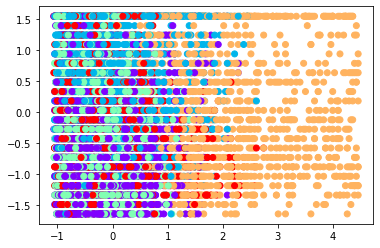

In [27]:
plt.scatter(X_scaled[:,X_features.index("training_hours")],X_scaled[:,X_features.index("experience")],c=clustering.labels_,cmap='rainbow')

DISCUSS